<!-- Untitled8 (4).ipynb_
            **M505 Assessment Report: Bank Marketing Dataset**
Bank Term Deposit Subscription Prediction
Fereshteh Safarkhani, Student ID: GH1031192

Introduction:
Banks often rely on telemarketing to offer financial products like term deposits. These campaigns typically involve reaching out to potential customers by phone, which can be time consuming and resource heavy. Even with all that effort, the success rate is usually quite low.

By using machine learning, however, banks can get a clearer idea of which customers are more likely to be interested. This makes it easier to focus their marketing on the right people, helping to cut costs and boost overall efficiency.

Business Problem:
A Portuguese bank is looking to boost the number of customers who sign up for its term deposit products. In the past, their telemarketing campaigns haven’t had much success. To improve this, they’re turning to machine learning to help predict which clients are most likely to subscribe. This way, the bank can focus its efforts where they’re most likely to pay off.

Business Understanding
This project aims to make a bank’s telemarketing campaign for term deposits more effective. By analyzing customer data, we can predict which clients are likely to subscribe. This helps the bank concentrate its efforts on those with the highest potential, improving overall efficiency.

Business Questions
As part of this project, we aim to answer the following key business questions:

Which machine learning model best predicts customer subscription?
How can we address the class imbalance in the target variable?
What are the business implications of false positives and false negatives in predictions?
Importing Necessary Libraries
To build an effective machine learning pipeline, several Python libraries are used in this project:

Pandas and NumPy for data loading and manipulation
Matplotlib and Seaborn for data visualization
Scikit-learn for preprocessing, model building, and evaluation
Imbalanced-learn (SMOTE) to handle class imbalance in the -->


<p>
M505C Assessment Report: Bank Marketing Dataset
<p>
Predicting Customer Subscription to Term Deposit Campaigns Using Machine Learning
<p>
Fereshteh Safarkhani
<p>
Student ID: GH1031192

**Introduction & Problem Statement**
<p>

Banks often run marketing campaigns to encourage people to sign up for term deposits. The problem is, reaching out to every single customer isn’t always smart—it costs a lot and doesn’t bring in many results. Most people just aren’t interested, and that means a lot of wasted effort.

This project takes a different approach. Instead of contacting everyone, we use machine learning and data analysis to figure out who is actually likely to say yes. By predicting which customers are more interested in term deposits, the bank can focus its time and money on the right people. That means better results, less wasted time, and lower costs.






**Business Questions**


1. Which customer segments show the highest conversion rates? 
2. How does hyperparameter tuning improve model performance in predicting customer subscription?
3. How effective are different campaign strategies?




**Data Understanding**


This study uses the Bank Marketing  from the UCI Machine Learning Repository available on the **[UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)**

This dataset uses collected information from marketing compaigns from Portuguese bank. These companies try to convince customers to subscribe to term deposit products.

The dataset contains **41,188 records** of clients contacted for marketing campaigns and each one represents a different client who was contacted as part of the campaign. The dataset has enough customer information that we can use to predict their response.



**Importing Necessary Libraries:**

Several Python libraries are used in this projec for build an effective machine learning pipeline

1. Pandas and NumPy for data loading and manipulation
2. Matplotlib and Seaborn used for data visualization
3. Scikit-learn for preprocessing, model building, and evaluation
4. Imbalanced-learn (SMOTE) to handle class imbalance in the target variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



**Data Exploration & Data Cleaning**

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.shape


(41188, 21)

### Sampling the Data

The code creates a random sample from the original dataset. First, it selects 30% of the entire dataset, then it performs stratified sampling, where it takes 30% of each class group in the target variable y (for example, subscribed and not). 

This makes the class distribution in the sample reflects the original dataset.

So, it displays each class in the sampled data to confirm the balance.


In [3]:
df_sample = df.sample(frac=0.3, random_state=42)
print(df_sample.shape)
df_sample = df.groupby('y', group_keys=False).apply(
    lambda x: x.sample(frac=0.3, random_state=42)
).reset_index(drop=True)
print(df_sample['y'].value_counts(normalize=True))

(12356, 21)
y
no     0.887342
yes    0.112658
Name: proportion, dtype: float64


C:\Users\ANGEL\AppData\Local\Temp\ipykernel_25124\1162632950.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('y', group_keys=False).apply(


###  Checking Class Balance

After sampling, I checked the percentage of target class to make sure the balance is still okay.  

In [4]:
df_sample['y'].value_counts(normalize=True) * 100

y
no     88.734218
yes    11.265782
Name: proportion, dtype: float64

In [5]:
print(df_sample.shape)
df_sample.head(3)

(12356, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,24,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1,37,management,married,university.degree,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,44,self-employed,single,professional.course,no,no,no,cellular,may,mon,...,6,12,1,success,-1.8,92.893,-46.2,1.354,5099.1,no


### Checking for Missing Values

Before evverything we need to check if there are any missing values in the dataset. 


In [6]:
print(df_sample.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Checking for 'Unknown' Values

In categorical columns, I found some unknown values such as:  
default, job, and education have noticeable percentages of unknown values. 
These can be treated like missing data and should be handled before building the model.


In [7]:
total_rows = len(df_sample)
for col in df_sample.columns:
    if df_sample[col].dtype == 'object':
        unknown_count = df_sample[col].value_counts().get('unknown', 0)
        unknown_percentage = (unknown_count / total_rows) * 100     
        print(f"Column '{col}': {unknown_count} unknowns ({unknown_percentage:.2f}%)")

Column 'job': 96 unknowns (0.78%)
Column 'marital': 22 unknowns (0.18%)
Column 'education': 528 unknowns (4.27%)
Column 'default': 2613 unknowns (21.15%)
Column 'housing': 280 unknowns (2.27%)
Column 'loan': 280 unknowns (2.27%)
Column 'contact': 0 unknowns (0.00%)
Column 'month': 0 unknowns (0.00%)
Column 'day_of_week': 0 unknowns (0.00%)
Column 'poutcome': 0 unknowns (0.00%)
Column 'y': 0 unknowns (0.00%)


### Handling 'Unknown' Values
I replaced them with the most common value "mode" in each column.  
I used mode because it's the best way to handle missing categorical data, instead of removing them.



In [8]:
columns_to_replace = ['job', 'marital', 'education', 'housing', 'loan']
for col in columns_to_replace:
    mode_value = df_sample[col].mode()[0]
    df_sample[col] = df_sample[col].replace('unknown', mode_value)



I removed duration because it’s only known after contacting the customer.


I also dropped default because it has too many unknown values more than 21% of the data.
Keeping it may add some noise or effects bad for predictions, so i decided it’s better to leave it out.

In [9]:
df_sample = df_sample.drop(columns=['duration'])
df_sample = df_sample.drop(columns=['default'])

###  Removing Duplicate Rows
I found some duplicate rows. they mess with repeated information which might bias the results.  
So, i dropped (208) them all to keep things clean.  

In [11]:
duplicate_rows = df_sample.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df_sample = df_sample.drop_duplicates()
print(f"Remaining duplicate rows: {df_sample.duplicated().sum()}")

Number of duplicate rows: 208
Remaining duplicate rows: 0


###  Quick Summary of the Data

After cleaning the dataset, we look at the numbers using `describe()`.  
This gives us the basic explanation of numeric features.  
It helps to confirm that the data looks reasonable.

In [12]:
df_sample.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000
mean,39.983866,2.551613,962.705054,0.175091,0.086203,93.580001,-40.459837,3.623378,5166.917797
std,10.254459,2.683837,186.355869,0.497179,1.568436,0.576722,4.604588,1.735015,72.229362
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Cheking outliers

This code generates boxplots for all numeric columns to visualize outliers.

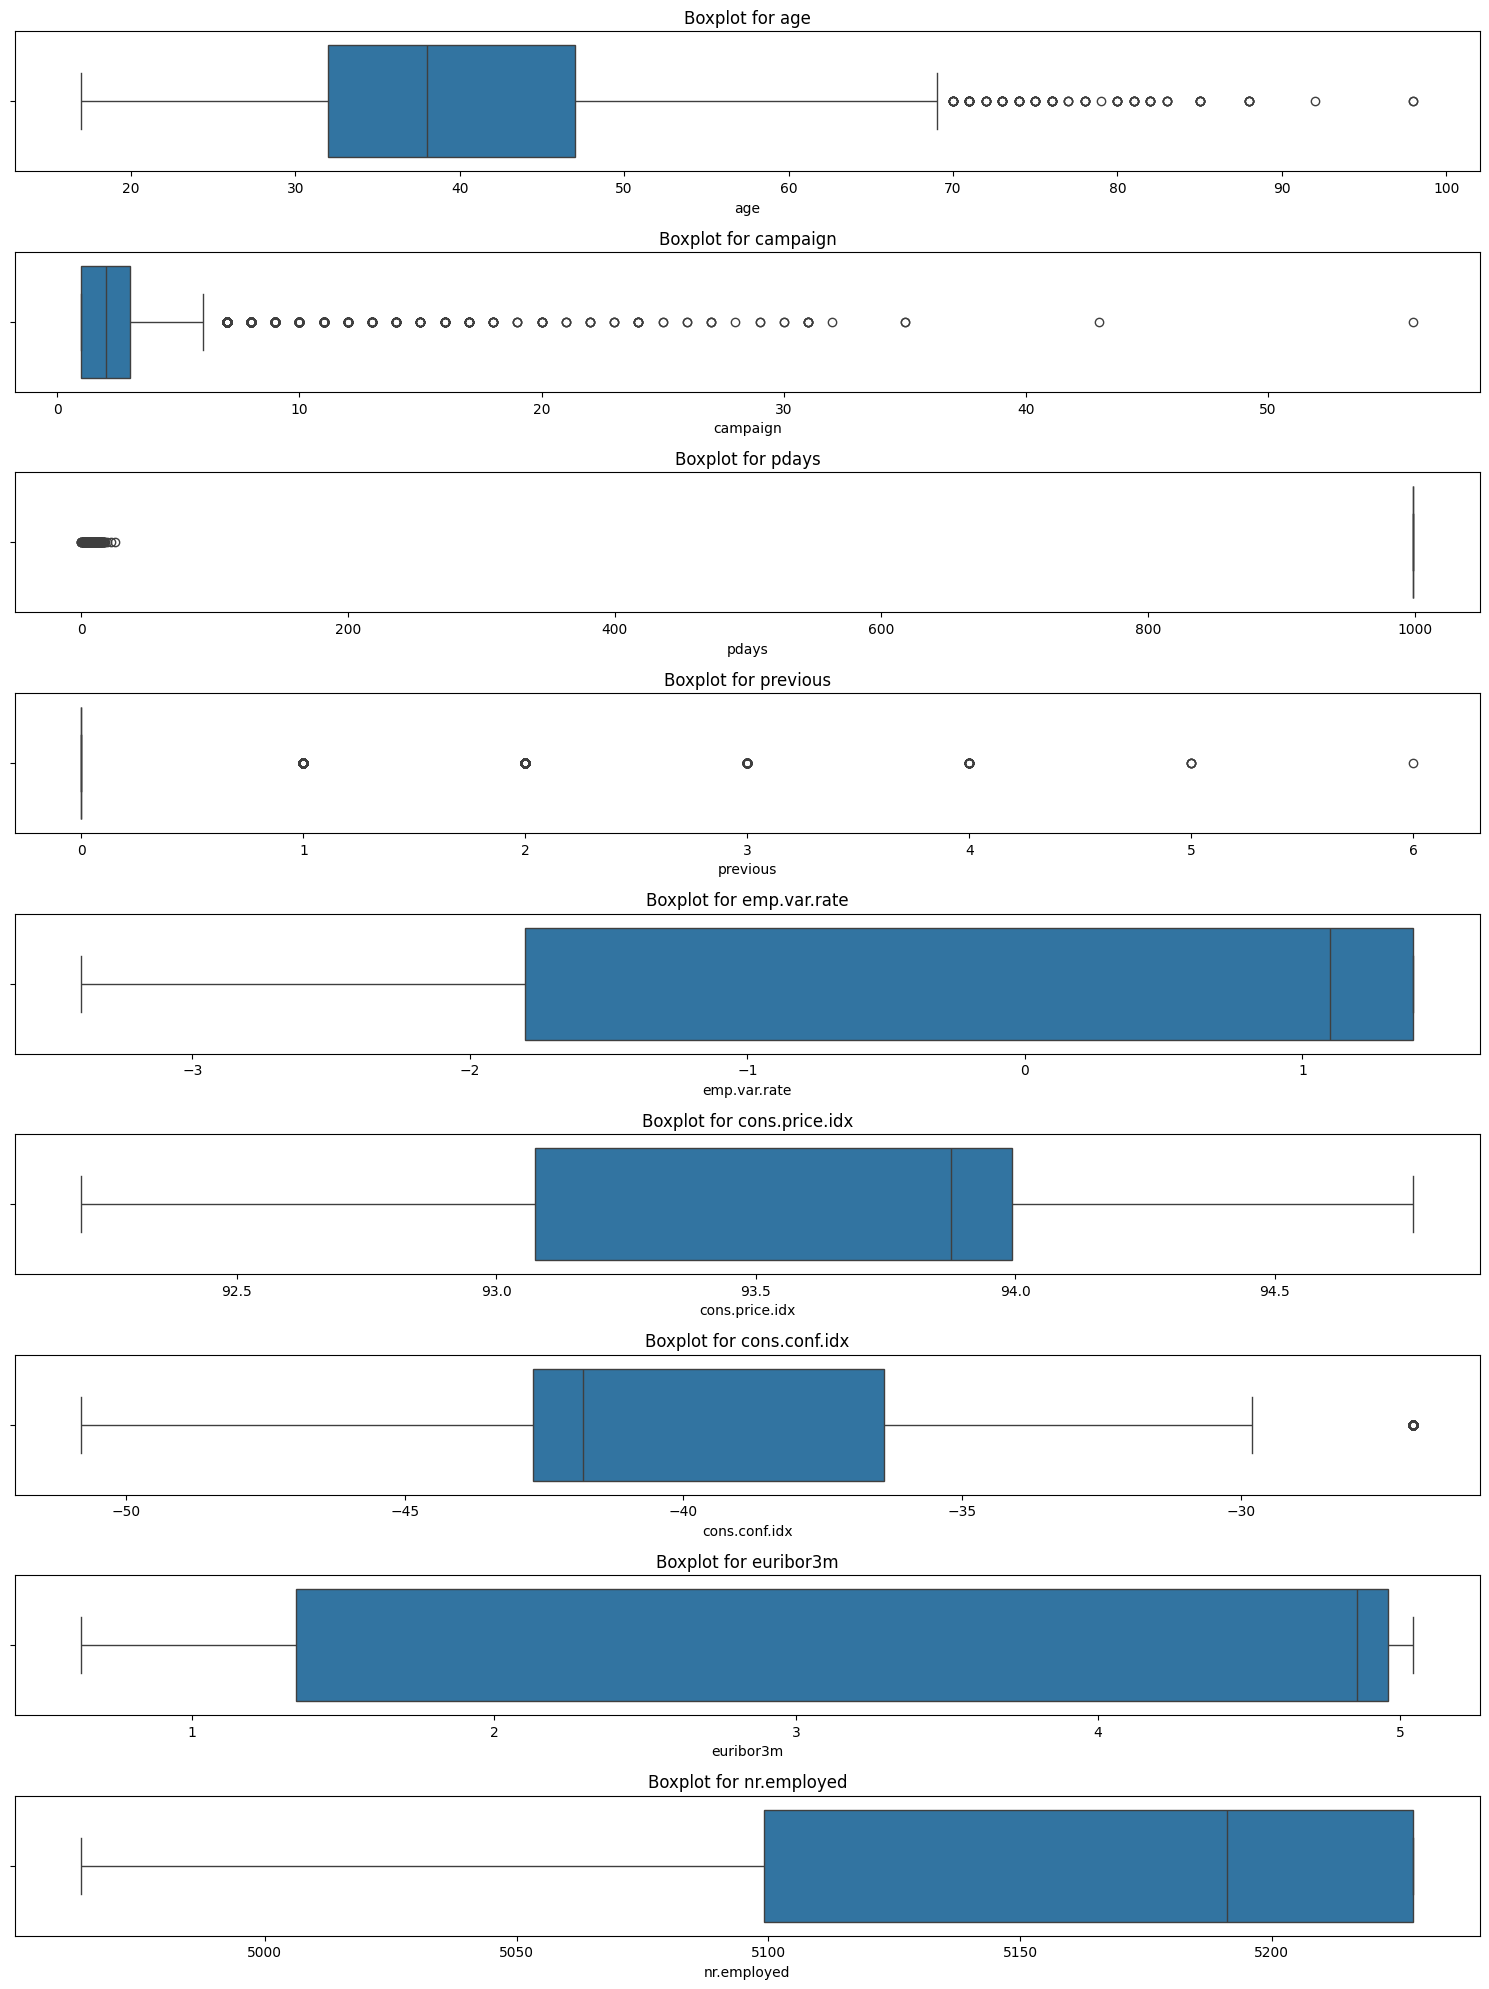

In [13]:

numeric_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1) 
    sns.boxplot(x=df_sample[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
plt.show()


### Handling Outliers

I capped campaign at 10 and previous at 5 to handle extreme values. While very high values in these columns are rare and can impact the model negatively.  

I created a new binary flag for the pdays columnpdays was contacted, showing the customer had been contacted  before or not. before.

No other changes were made to other columns like age and economic indicators cause their seems are realistic.


In [14]:
df_sample['campaign'] = df_sample['campaign'].apply(lambda x: 10 if x > 10 else x)
df_sample['previous'] = df_sample['previous'].apply(lambda x: 5 if x > 5 else x)
df_sample['pdays_was_contacted'] = df_sample['pdays'].apply(lambda x: 0 if x == 999 else 1)

### Correlation matrix

Looking at the correlation matrix, i can see some strong relationships between economic features. Like, emp.var.rate, euribor3m, and nr.employed are highly correlated with each other above 0.9. There's also a perfect negative correlation (-1) between pdays and pdays was contacted because we created the second one based on the first.

Even though these correlations are high, i am keeping all the features for now. because Random Forest, can automatically handle this and shows which features are really important.

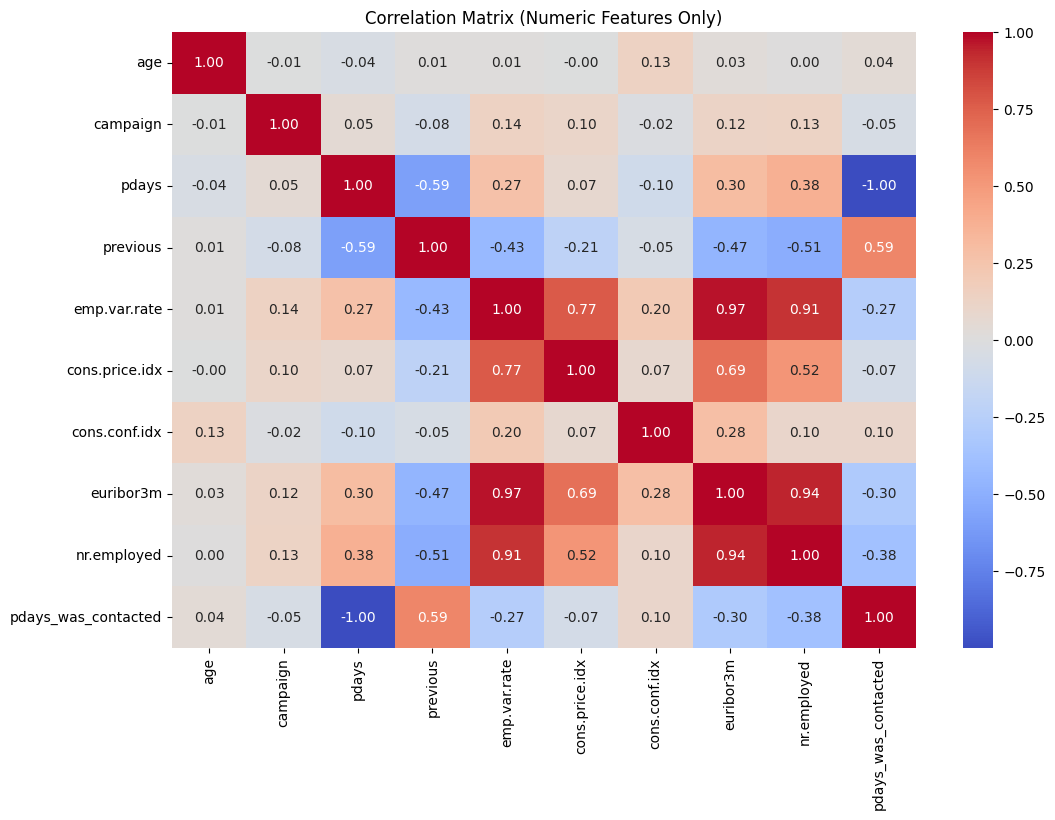

In [16]:

numeric_df_sample = df_sample.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df_sample.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

In [17]:
df_sample["y"].value_counts()

y
no     10763
yes     1385
Name: count, dtype: int64

### Convert target for numertic process




In [18]:
df_sample['y'] = df_sample['y'].map({'no': 0, 'yes': 1})

### Defining X and Y

I  defined the dataset into two sides. y for target feature that is subscribed and x for other features and the rest as X.


In [19]:
X = df_sample.drop('y', axis=1)
y = df_sample['y']

 ### Splitting the Data into Training and Test Sets

20% for testing and 80% for training  and  reproducibility with random_state=42

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    random_state=42,   
)
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (9718, 19)
Test shape: (2430, 19)



### One-Hot Encoding Standadization

ِThis datasets have both numbers and categories. Machine learning models can’t handle categories in their original way, we need to turn them into numbers first.Then, these numbers should be standardize on the same level.
I used StandardScaler to scale them, so they’re all on the same scale now. Then, i took the categorical columns and turned them into numbers with OneHotEncoder.
After setting up the transform, I applied it to both the training / test data. Now it is prepared are fully numeric and standardized.





In [21]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

num_att = x_train.select_dtypes(include=["int64", "float64"]).columns
cat_att = x_train.select_dtypes(include="object").columns

col_tfr = ColumnTransformer([
    ("standard_scaler", StandardScaler(), num_att),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_att)
])

col_tfr.fit(x_train)

x_train = col_tfr.transform(x_train)
x_test = col_tfr.transform(x_test)

print("x_train_prepared shape:", x_train.shape)
print("x_test_prepared shape:", x_test.shape)


Train shape: (9718, 19)
Test shape: (2430, 19)
x_train_prepared shape: (9718, 55)
x_test_prepared shape: (2430, 55)



###  Fixing Imbalanced Data with SMOTE

I  noticed the classes were imbalanced that one have  fewer samples than the other. So, i used SMOTE to fix that.
SMOTE basically creates new  samples for the minority class so both classes have an equal number of samples to helps the model learn better and not just focus on the majority class.
so, i applied SMOTE on x_train and y_train.
After i got x_train_balanced and y_train_balanced that where both classes are balanced.


In [22]:

smote = SMOTE(random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
print( y_train_balanced.value_counts())



y
0    8588
1    8588
Name: count, dtype: int64



### Question 1: Which customer segments show the highest conversion rates?



The following insights were observed:

- Students and retirees have the highest subscription rates.
- Single individuals are more likely to subscribe than married or divorced customers.
- Customers with higher education, especially university students , show a greater interest to subscribe.
- Older customers specially those aged 60 and above  have the highest conversion rates.

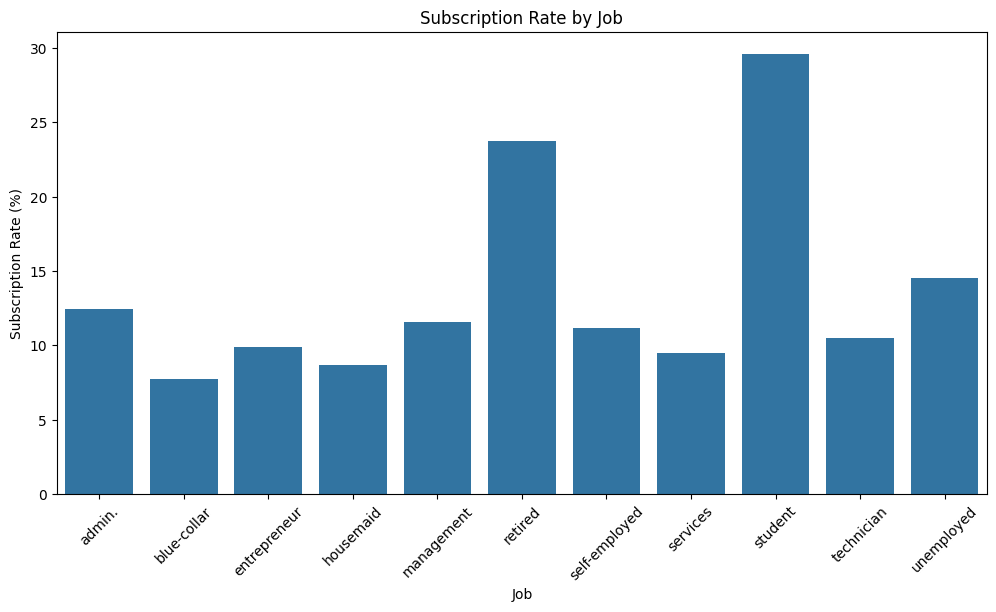

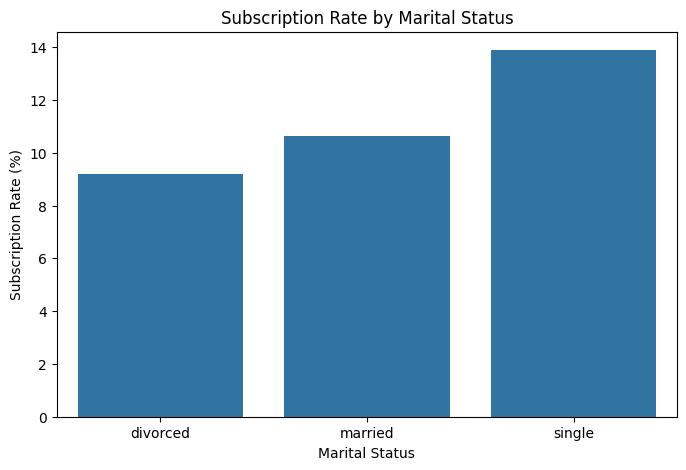

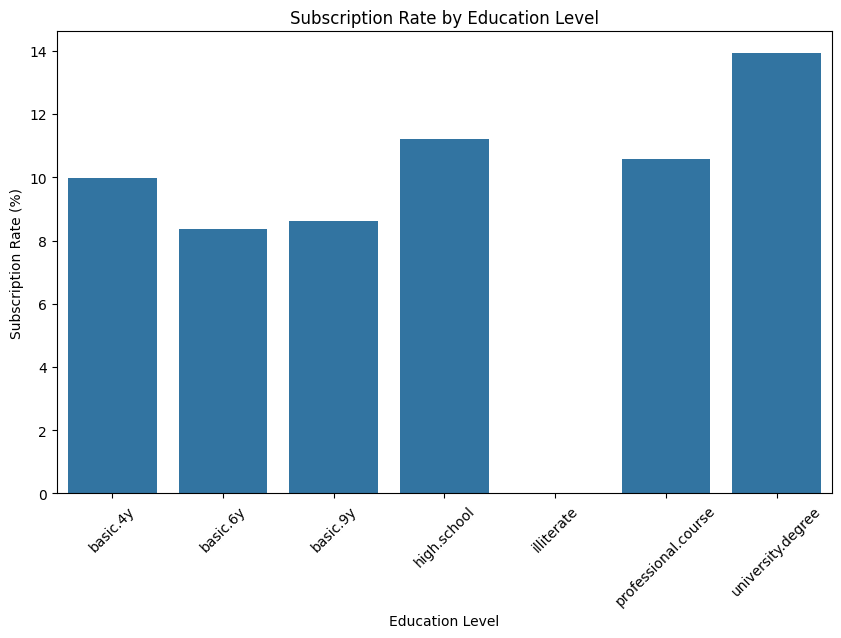

C:\Users\ANGEL\AppData\Local\Temp\ipykernel_25124\114801895.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conversion = df_sample.groupby('age_group')['y'].mean() * 100


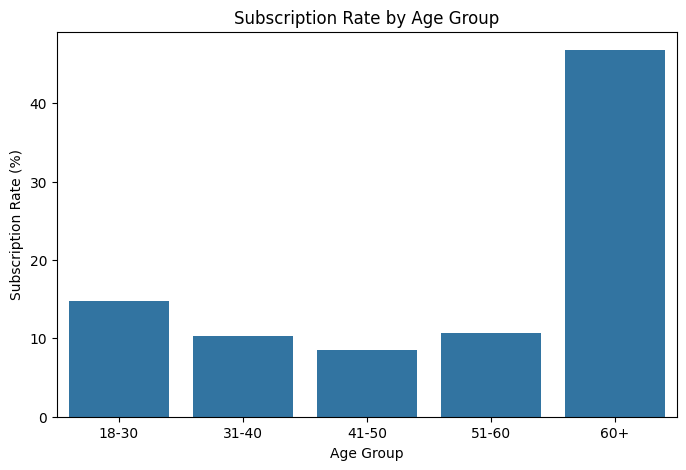

In [23]:
job_conversion = df_sample.groupby('job')['y'].mean() * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=job_conversion.index, y=job_conversion.values)
plt.xticks(rotation=45)
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate (%)')
plt.show()

marital_conversion = df_sample.groupby('marital')['y'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=marital_conversion.index, y=marital_conversion.values)
plt.title('Subscription Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate (%)')
plt.show()

education_conversion = df_sample.groupby('education')['y'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=education_conversion.index, y=education_conversion.values)
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()

df_sample['age_group'] = pd.cut(df_sample['age'], bins=[18, 30, 40, 50, 60, 100], 
                                labels=['18-30', '31-40', '41-50', '51-60', '60+'])

age_conversion = df_sample.groupby('age_group')['y'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=age_conversion.index, y=age_conversion.values)
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
plt.show()



### MODELS
The performance of five machine learning models was evaluated using some metrics. 
The classification reports are in the tables. The models include Support Vector Machine, Logistic Regression, Naive Bayes, Decision Tree, and Random Forest. Each model was assessed on a test dataset to se subscription (1) and not cases (0).



### SVM Classifier

SVM accuracy is 88%, with strong results on Class 0 but weak on Class 1.


Classification Report - SVM
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2175
           1       0.43      0.56      0.48       255

    accuracy                           0.88      2430
   macro avg       0.69      0.73      0.71      2430
weighted avg       0.89      0.88      0.88      2430



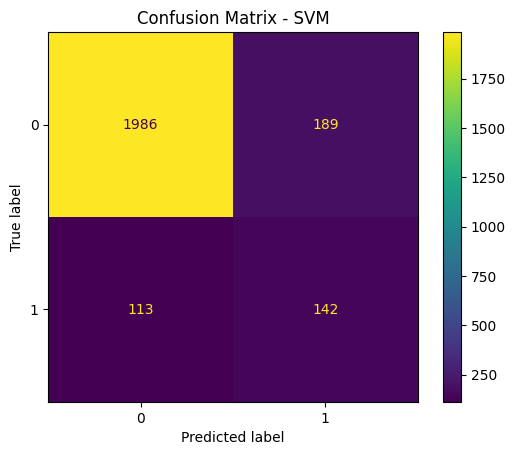

In [24]:

model_svm = SVC(probability=True, random_state=42)
model_svm.fit(x_train_balanced, y_train_balanced)
y_pred_test_svm = model_svm.predict(x_test)

print("Classification Report - SVM")
print(classification_report(y_test, y_pred_test_svm, zero_division=0))

cm_svm = confusion_matrix(y_test, y_pred_test_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix - SVM')
plt.show()


### Logistic Regression Classifier

Logistic Regression accuracy is 83%, its good performance on Class 0 but low precision (33%) and recall (62%) on Class 1.


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2175
           1       0.33      0.62      0.43       255

    accuracy                           0.83      2430
   macro avg       0.64      0.74      0.66      2430
weighted avg       0.89      0.83      0.85      2430



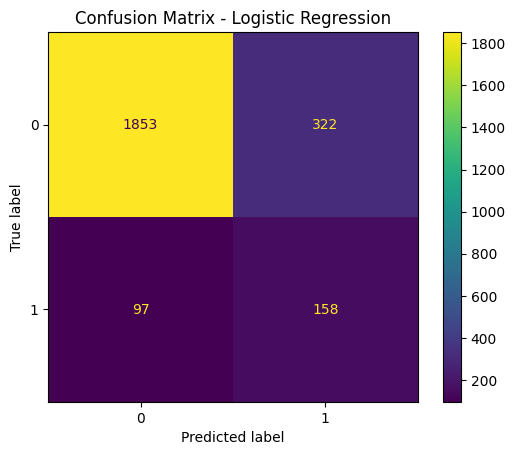

In [25]:

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(x_train_balanced, y_train_balanced)
y_pred_test_lr = model_lr.predict(x_test)

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_test_lr, zero_division=0))

cm_lr = confusion_matrix(y_test, y_pred_test_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Naive bayes Classifier

Naive Bayes accuracy is 77%, with strong performance on Class 0 but low precision (26%) and moderate recall (63%) on Class 1.


Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2175
           1       0.26      0.63      0.36       255

    accuracy                           0.77      2430
   macro avg       0.60      0.71      0.61      2430
weighted avg       0.88      0.77      0.81      2430



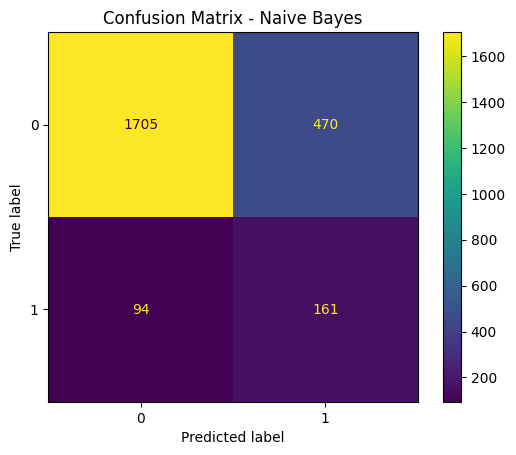

In [26]:
from scipy.sparse import issparse
model_nb = GaussianNB()

if issparse(x_train_balanced):
    x_train_nb = x_train_balanced.toarray() 
    x_test_nb = x_test.toarray()
else:
    x_train_nb = x_train_balanced
    x_test_nb = x_test

model_nb.fit(x_train_nb, y_train_balanced)
y_pred_test_nb = model_nb.predict(x_test_nb)

print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_test_nb, zero_division=0))

cm_nb = confusion_matrix(y_test, y_pred_test_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### Decision Tree Classifier
Decision Tree accuracy is 85%, with good results on Class 0, but low precision (32%) and recall (41%) on Class 1.


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2175
           1       0.32      0.41      0.36       255

    accuracy                           0.85      2430
   macro avg       0.62      0.65      0.64      2430
weighted avg       0.86      0.85      0.85      2430



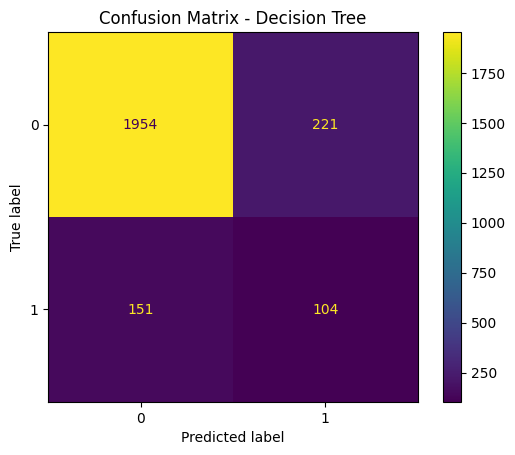

In [27]:

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train_balanced, y_train_balanced)
y_pred_test_dt = model_dt.predict(x_test)

print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_test_dt, zero_division=0))

cm_dt = confusion_matrix(y_test, y_pred_test_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Random Forest Classifier

Random Forest accuracy is 90%, with strong performance on Class 0, but moderate precision (53%) and low recall (37%) on Class 1.


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2175
           1       0.53      0.37      0.44       255

    accuracy                           0.90      2430
   macro avg       0.73      0.67      0.69      2430
weighted avg       0.89      0.90      0.89      2430



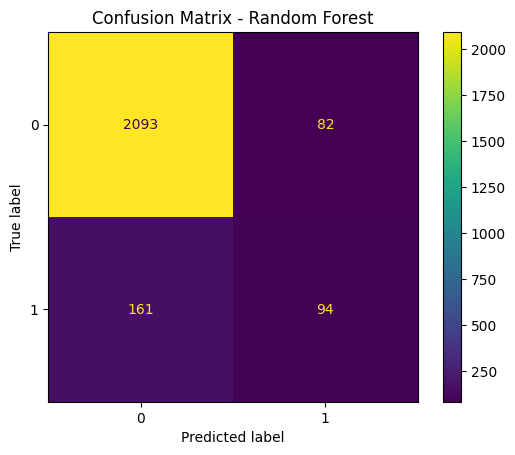

In [28]:

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train_balanced, y_train_balanced)
y_pred_test_rf = model_rf.predict(x_test)

print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_test_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()




All models work well for the majority class  but Random Forest gives the best accuracy.  

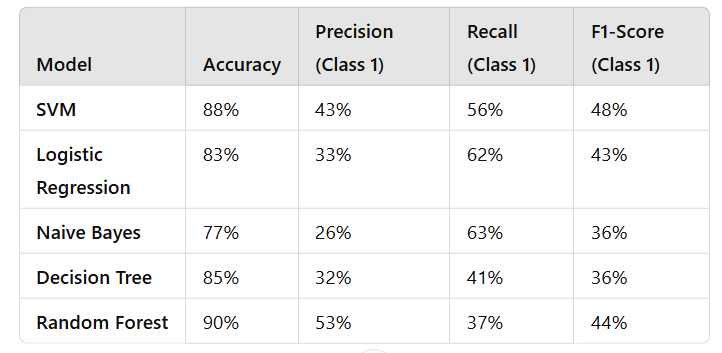

### Question 2. How does hyperparameter tuning improve model performance in predicting customer subscription?



### Trunung 

I used GridSearchCV  to tune the hyperparameters and improve model performance. It tests different settings using cross validation to find the best parameters for each model.

Decision Tree (DT): Tuning max_depth with values [10, 20, 30].

Support Vector Machine (SVM): Tuning C, gamma, and kernel with C values [1, 10, 15], gamma values [0.01, 0.1, 0.2], and using the poly kernel.

Random Forest (RF): Tuning n_estimators, max_depth, min_samples_split, and min_samples_leaf.

Logistic Regression (LR): Tuning C, penalty, and solver.

Naive Bayes (NB): Tuning var_smoothing with values ranging from 1e-9 to 1e-6.

In [29]:
param_grid_DT = {"max_depth": [10, 20, 30]}
param_grid_SVM = {"C": [1, 10,15], "gamma": [0.01, 0.1,0.2], "kernel":["poly"]}
param_grid_RF = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [None, 10, 20, 30], 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4]  
}

param_grid_LR = {
    "C": [0.1, 1, 10, 100],  
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"]  
}

param_grid_NB = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]  
}

I used GridSearchCV with 5-fold cross validation for all 5 models. The best parameters and accuracy scores were found for each. These settings were then used to build the final models for testing.





In [30]:
grid_search_DT = GridSearchCV(DecisionTreeClassifier(), param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_DT.fit(x_train, y_train)

print(f"Best Decision Tree Parameters: {grid_search_DT.best_params_}")
print(f"Best Decision Tree Accuracy: {grid_search_DT.best_score_}")

grid_search_SVM = GridSearchCV(SVC(), param_grid_SVM, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_SVM.fit(x_train, y_train)

print(f"Best SVM Parameters: {grid_search_SVM.best_params_}")
print(f"Best SVM Accuracy: {grid_search_SVM.best_score_}")

grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(x_train, y_train)
print(f"Best Random Forest Parameters: {grid_search_RF.best_params_}")
print(f"Best Random Forest Accuracy: {grid_search_RF.best_score_}")


grid_search_LR = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_LR.fit(x_train, y_train)
print(f"Best Logistic Regression Parameters: {grid_search_LR.best_params_}")
print(f"Best Logistic Regression Accuracy: {grid_search_LR.best_score_}")

grid_search_NB = GridSearchCV(GaussianNB(), param_grid_NB, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_NB.fit(x_train, y_train)
print(f"Best Naïve Bayes Parameters: {grid_search_NB.best_params_}")
print(f"Best Naïve Bayes Accuracy: {grid_search_NB.best_score_}")

Best Decision Tree Parameters: {'max_depth': 10}
Best Decision Tree Accuracy: 0.8859850915706694
Best SVM Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
Best SVM Accuracy: 0.8933935579658117
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8968920827958969
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression Accuracy: 0.8953486611218068
Best Naïve Bayes Parameters: {'var_smoothing': 1e-06}
Best Naïve Bayes Accuracy: 0.833403332422604


Model Comparison: Baseline vs After Hyperparameter Tuning

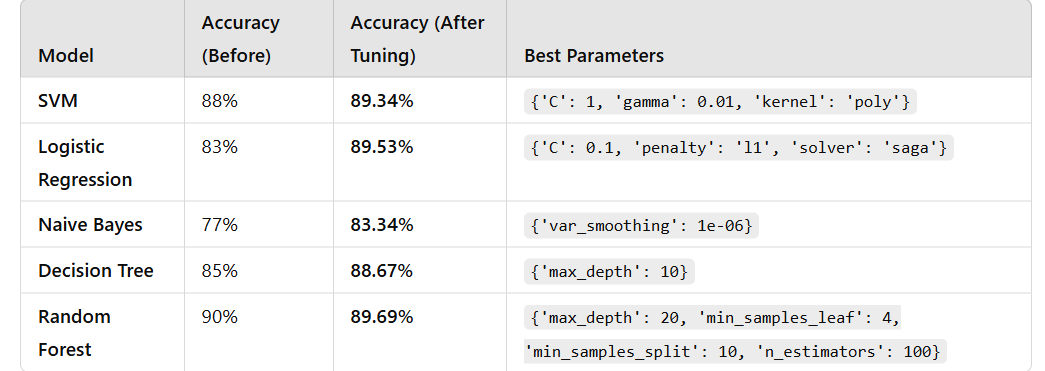


in our initial model evaluation, Random Forest had  the highest accuracy (90%) but lower recall for the minority class (Class 1) like other models that has problem with class imbalance.
After tuning  hyperparameter by using GridSearchCV, all models improved performance on cross-validation accuracy.
but Random Forest maintained i didnt with the best accuracy (89.69%), while SVM and Logistic Regression achieved competitive results. 

### Question 3. How effective are different campaign strategies?

Based on these insights, the following recommendations will improve campaign strategies in the future:

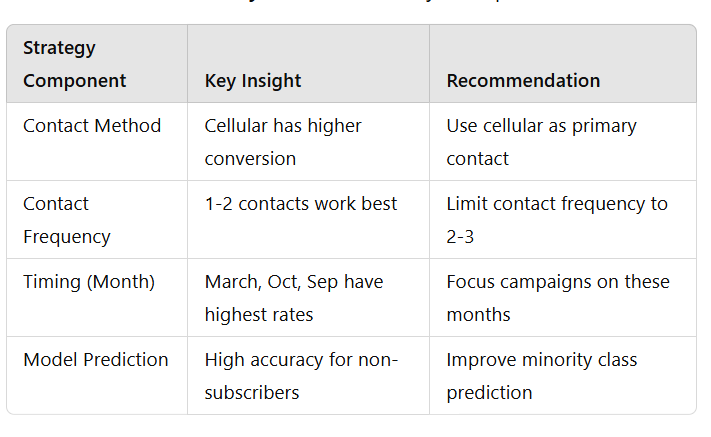

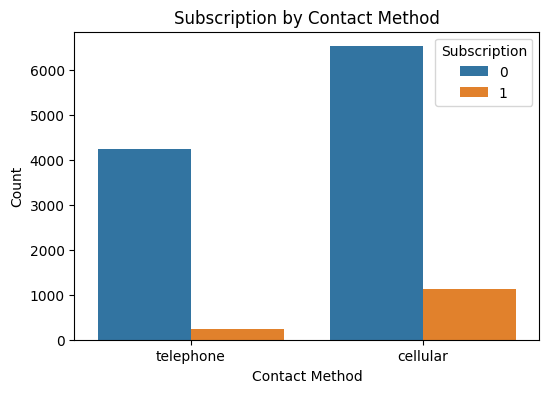

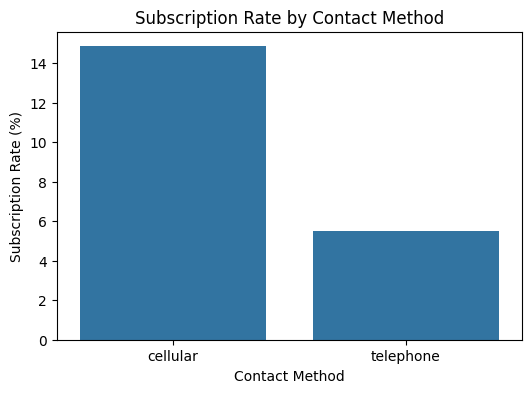

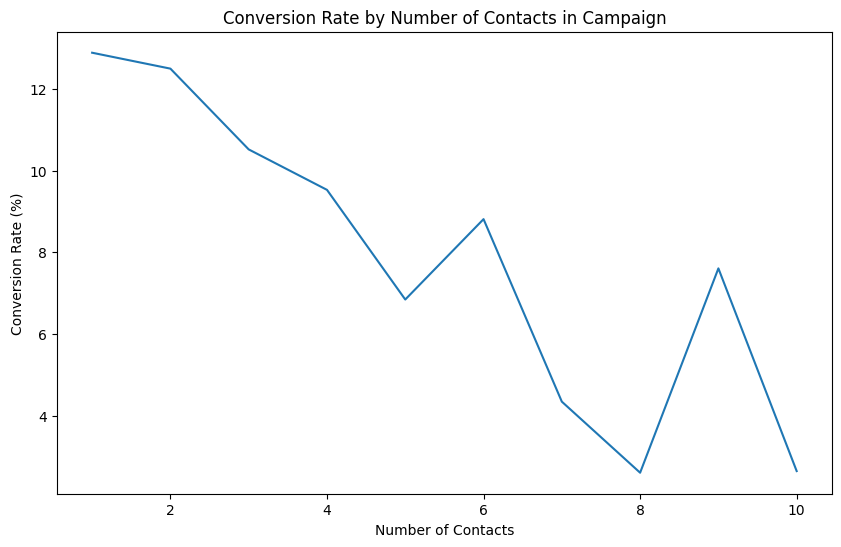

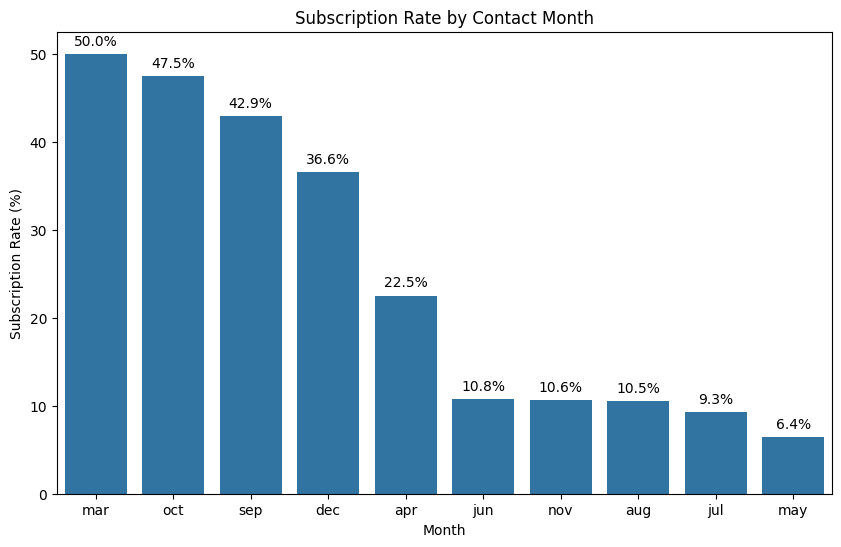

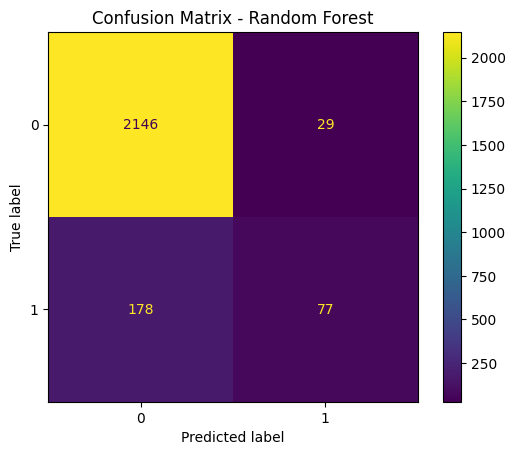

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contact', hue='y', data=df_sample)
plt.title('Subscription by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.show()

contact_conversion = df_sample.groupby('contact')['y'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=contact_conversion.index, y=contact_conversion.values)
plt.title('Subscription Rate by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Subscription Rate (%)')
plt.show()
campaign_success = df_sample.groupby('campaign')['y'].mean() * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x=campaign_success.index, y=campaign_success.values)
plt.title('Conversion Rate by Number of Contacts in Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Conversion Rate (%)')
plt.show()

month_conversion = df_sample.groupby('month')['y'].mean() * 100
month_conversion = month_conversion.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_conversion.index, y=month_conversion.values)
plt.title('Subscription Rate by Contact Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (%)')

for index, value in enumerate(month_conversion.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')
    
plt.show()
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grid_search_RF.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix - Random Forest')
plt.show()



### Conclusion 

In this project, i focused on predicting customer subscription by using the bank marketing dataset. For evaluation i used six machine Logistic Regression, Naive Bayes, Decision Tree, K-Nearest Neighbors, Support Vector Machine (SVM), and Random Forest.

Among these Random Forest was the best with 90%, then SVM 88%  and Decision Tree with 85% accuracy.

To improve model effectiveness, i applied hyperparameter tuning to Decision Tree and SVM using GridSearchCV. 
After optimizing the model, Random Forest didnt increased the accuracy but all other did!
Finally, we understood Random forest is the best model for this dataset to predict the customer subscription.
For future improvements, techniques like cost-sensitive learning could be applied to better handle class imbalance and further enhance the model’s performance.




